# Analysis of the Spotify Dataset 

### Date: March 13, 2022
### By: Ophelia, Anh, Anthony

## Introduction (an overview of your entire project, your research topic and question, your motivation to study this topic, and any prior related work)

# Introduction (300)

In [120]:
# import all libraries in this cell 
import pandas as pd
import re 
from matplotlib import pyplot as plt
import seaborn as sns

In [121]:
# import the dataset 
df = pd.read_csv("spotify_dataset.csv")

## Methods  (explain your data and your analytical process)

For this project, we are using a dataset of Spotify 200 Charts (2020-2021) retrieved from Sashank Pillai on Kaggle. The link to the dataset is found on https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021. The dataset utilizes information from spotifycharts.com and the Spotify Python API to retrieve different aspects and attributes of top hit songs within the past two years, from pre-Covid to post-Covid.

The columns in the dataset includes: Highest Charting Position, Number of Times Charted, Week of Highest Charting,Song Name, Song ID, Streams, Artist, Artist Followers, Genre, Release Date, Weeks Charted, Popularity, Danceability, Acousticness, Energy, Instrumentalness, Liveness, Loudness, Speechiness, Tempo, Valence, and Chord. A more detailed discussion of each of the attributes can be found on the Kaggle website.

In this project, we will utilize certain attributes in the dataset and Python plotting libraries like Pandas, matplotlib, Sklearn, etc. to explore patterns and trends to conclude in regards to how each attribute contributed to a song popularity over time.

### We are interested in the variables that contribute to a factor's popularity. 

Popularity in this dataset is measured on a continuous scale form 1-100. Thus, we are thinking of using the Linear Regression model rather than logistic, random forest and other classication ones from skylearn. 

Note: We will create a new dataframe with the cleaned variables to conduct analysis. This new dataframe with cleaned variables will be called **cleaned_df**. When we finishing cleaning all data, we will add it to this dataframe. 

In [122]:
cleaned_df=pd.DataFrame()

To begin our analysis, we will first take a general look on the dataset, and select the variables that we want to focus on. Below is a general look at our selected dataset. 

In [123]:
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


The columns for the dataframe is listed below. There are 23 columns in total. 

In [124]:
df.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

To measure popularity, we will use the **Popularity** column as our **response variable**. 

After a quick inspection, we decide to work with the following columns as our **independent variables**:

Numerical values 
- Danceability 
- Energy
- Loudness
- Speechiness
- Acousticness
- Liveness
- Tempo
- Duration (ms) 
- Valence 

Categorical ones 
- Week of Highest Charting
- Genre

A total of 11 independent variables. 

To simplify our dataframe and extract only the columns with variables that we are interested in, we first dropped all other unused columns from the original dataframe and any rows with empty values.

In [125]:
df = df.drop(['Index', 'Highest Charting Position', 'Number of Times Charted','Song Name', 
              'Streams', 'Artist', 'Artist Followers', 'Song ID', 'Release Date', 
              'Weeks Charted','Chord'],axis=1)

In [126]:
df = df.drop(index=[35,163,464,530,636,654,750,784,876,1140,1538],axis=1)

#### Below will be an outline of our data cleaning, visualization and analysis process. 

First, we look at the distribution of the response variable, **Popularity**.

Then, we look at the distribution of numerical variables in this dataset, checking if they have abnormal values/outliers, and also if they would fit the major assumptions to conduct the linear analysis

- Multicollinearity (Independent vairables shouldn't be correlated with each other) 
- Independent variables should be roughly normally distributed in an ideal situation 

Then, we will transform the multi-level categorical variables into dummy variables. 

Finally, we will try to do a linear analysis, using cleaned data.

## Results (lay out your data exploration, your findings, and your visuals)

### Data Cleaning

We start our data cleaning process by looking at the data distribution of all the variables that we are interested in to investigate whether there are abnormal data distribution that requires further cleaning.

[Text(0.5, 0, 'Popularity')]

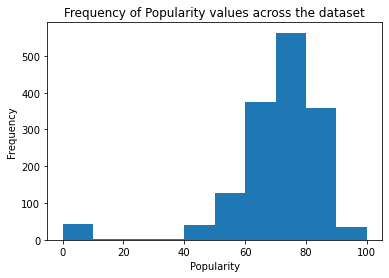

In [127]:
ax = df["Popularity"].astype("int").plot.hist(title='Frequency of Popularity values across the dataset')
ax.set(xlabel='Popularity')

The resulting graph shows a relatively normal distribution that is skewed right, with some outliers towards the zero-end of the number line. The skewed right distribution is appropriate for the dataset that we are using, since the dataset specifically looks at the Most Highly Rated songs on Spotify, so the high Popularity values are expected from the context of the dataset.

In [128]:
cleaned_df["Popularity"] = df["Popularity"].astype(float) 

#### Duration

Next, we look at our 'Duration' variable. Immediately, we realize that the variable 'Duration' is measured in ms, milleseconds. This does not make logical sense, so we will change it into minutes. Immediately, we realize that the variable 'Duration' is measured in ms, milleseconds. This does not make logical sense, so we will change it into minutes. 

In [129]:
duration_m = []
count = 160
for i in df["Duration (ms)"]:
    duration_m.append(round(int(i)/(1000*60),2))

In [130]:
cleaned_df['Duration (min)'] = duration_m

[Text(0.5, 0, 'Duration (min)')]

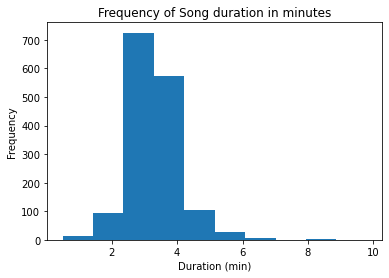

In [131]:
ax = cleaned_df['Duration (min)'].plot.hist(title='Frequency of Song duration in minutes')
ax.set(xlabel='Duration (min)')

The resulting graph also shows a normal distribution that is skewed left. In the context of songs, this also makes sense as most songs duration averages around 3-4 minutes, which is shown in our graph with the highest peak at 3-4 minutues. However, it should be noted that there is few outliers with some values above 8 minutes.

In [132]:
cleaned_df[['Danceability','Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
      'Tempo','Valence']]=df[['Danceability','Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
      'Tempo','Valence']].astype(float)

#### Creating a Month-Year column using Week of Highest Charting column

In [133]:
from datetime import datetime

Since we are looking to assess the trends and patterns in the songs attributes over time, we want to create a new column that will get us this "Time" variable. To do so, we use the 'Week of Highest Charting' variable to extract a substring that contains the Month and Year of the beginning of the week of its charting. This information will allow us to bucket the songs data into months starting from 2019 to 2021.

In [134]:
df["Week of Highest Charting"][0] # 5-6 indices are Month, 0-3 indices are Year

'2021-07-23--2021-07-30'

From the first value in the 'Week of Highest Charting', we can see that 1st to 4th indices in the string represent the Year and 6th to 7th indices represent the month. We use this to slice the string and extract the information that we need to create our new 'Time of Highest Charting' column for a more general and representative Time value that can be plotted. We convert it to a datetime object for proper sorting against the x-axis.

In [142]:
cleaned_df['Time of Highest Charting'] = df["Week of Highest Charting"].str.slice(0,10)
cleaned_df['Time of Highest Charting'] = pd.to_datetime(cleaned_df['Time of Highest Charting'], format='%Y-%m-%d')

In [143]:
cleaned_df.head()

,Popularity,Duration (min),Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Time of Highest Charting
0,100.0,3.53,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,0.589,2021-07-23
1,99.0,2.36,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,0.478,2021-07-23
2,99.0,2.97,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,0.688,2021-06-25
3,98.0,3.85,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,0.591,2021-07-02
4,96.0,3.53,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,0.894,2021-07-23


### Histogram of numerical columns 

To look at all of our other columns in greater detail, we decided to plot every column to explore the distribution of our dataset and get a general overview of the data that we are presented with.

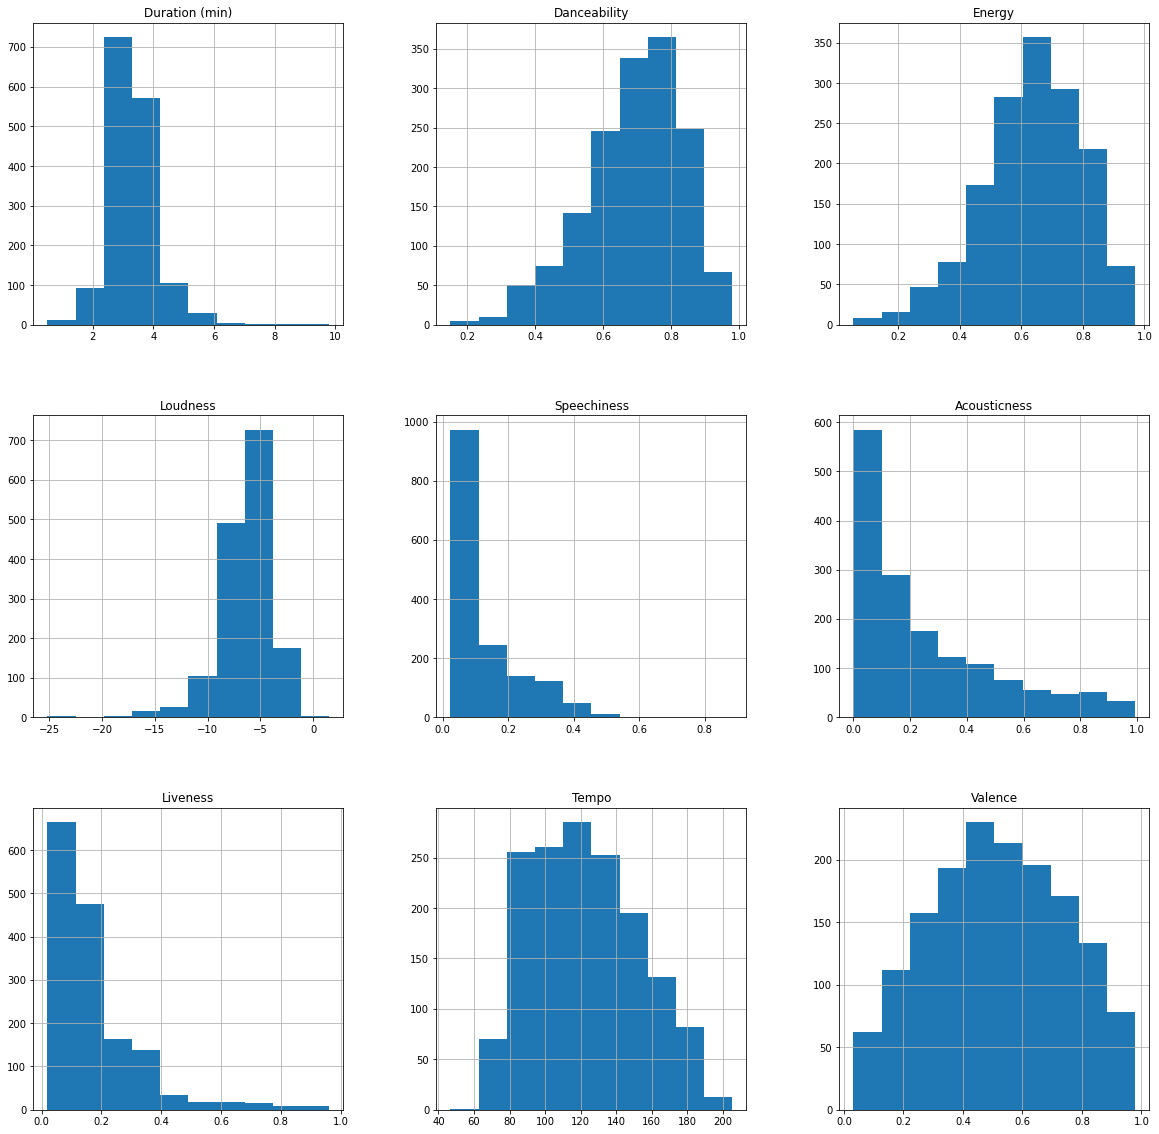

In [81]:
cleaned_df[cleaned_df.columns[1:]].hist(figsize=(20, 20))
plt.show()

The 9 graphs display the distribution of Duration (mins), Danceability, Energy, Loudness, Speechiness, Acousticness, Liveness, Tempo, and Valence. Most of the graphs show a normal distribution. From the overview, we can take notes of a few things: 
1. Songs with high danceability and energy are favored (with these graphs being skewed right heavily.
1. Song with smaller, or softer, loudness is preferred since the Loudness graph is skewed right towards 0. Since all of our data shows all negative values with no positive values, we can infer that songs that are softer and quieter than the standard threshold of 0 dB were more liked rather than loud.
1. In regards to Speechiness, we can see that the data is skewed left with >80% of data points are near 0. This shows that most of the popular songs had few words and mostly melody.
1. This goes in line with the Acousticness graph as it is also skewed left. Since there were few words spoken in these popular tracks, we expect that Acousticness levels would be low as well.
1. The Liveness graph is also skewed left, signifying that most of these songs were recorded in the studio rather than being performed live.
1. The Tempo graph shows a normal distribution that is slightly skewed left. Most of the tempo for the popular tracks is in the 80-140bpm range.
1. The Valence graph also shows a pretty even normal distribution. However, when looking at it more closely, we can see that more than 50% of songs have >0.4 valence, meaning people liked more positive and euphoric tracks with high valence. 

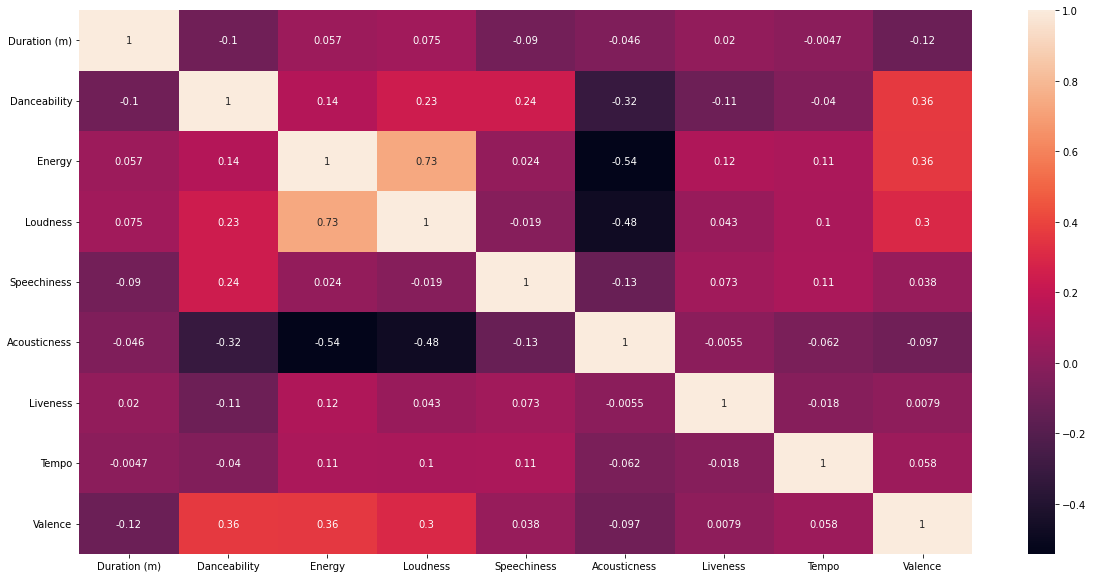

In [187]:
plt.figure(figsize=(20, 10))
sns.heatmap(cleaned_df[cleaned_df.columns[1:]].corr(),annot=True)
plt.show()

We computed a heatmap between all of our independent variables to see whether there is any correlation when comparing each attribute side by side. Overall, there are not many correlations within independent variables as most values are 0.1 or below. However, we can see some higher correlation with 'Energy' and 'Loudness', showing a correlational value of 0.73. In context, this information makes sense as higher energy songs tend to be louder as well. On the other hand, 'Energy' and 'Loudness' both have a negative correlation with 'Acousticness'. This is also valid since these generally louder and energized songs would mean lower acoustics. Some other slight positive correlation is 'Danceability', 'Energy', 'Loudness' that have a slight positive correlation with 'Valence' with values 0.30 and 0.36 correlation. This makes sense as we can expect more positive and vibrant song to have higher 'Danceability', 'Energy', and 'Loudness' in regards to how these attributes can make the listener feel more happy with these upbeat rhythm and tunes. 

Comment on the heatmap 
- Not many correlations within independent variables
- Energy & loudness - expected 
- Energy & Acousticness

### Trends of Popular Song Attributes over Time

Now, we want to look at the trends of different song attributes over time that is more than comparing these independent variables with one another. To pivot, we create a new column using the 'Week of Highest Charting' to deduce the time period that the song is most popular so that we can plot our data points on a timeline. Here, we are converting our previously independent variables of song attributes into dependent variables to plot against our new independent variable -- Time.

First, we grouped all of the data points that have the same Time of Highest Charting into buckets and find the average values of all the items in that group of each attribute. We also take the absolute values of the 'Loudness' column for more convenient plotting when plot against other values since this is the only column with negative values.

In [198]:
from sklearn import preprocessing

# Group rows into date buckets and find average
columns = ['Popularity', 'Duration (min)', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']
trend_df = cleaned_df.groupby(['Time of Highest Charting']).mean()
trend_df['Loudness'] = trend_df['Loudness'].abs()
trend_df

,Popularity,Duration (min),Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence
Time of Highest Charting,,,,,,,,,,
2019-12-27,72.707865,3.355281,0.714843,0.657483,5.509517,0.106035,0.230712,0.166566,123.478517,0.541694
2020-01-03,75.380000,3.192800,0.713440,0.595360,6.121700,0.106986,0.234130,0.149078,114.316980,0.490260
2020-01-10,60.409091,3.232273,0.744182,0.576273,7.015364,0.181300,0.233218,0.181627,124.783727,0.532218
2020-01-17,64.769231,3.619744,0.748154,0.598385,7.384333,0.176254,0.219311,0.214546,121.996769,0.426174
2020-01-24,51.000000,3.265556,0.716833,0.506889,8.530556,0.181672,0.355717,0.155344,128.838444,0.466556
...,...,...,...,...,...,...,...,...,...,...
2021-06-25,79.375000,3.557083,0.631750,0.678042,6.182958,0.188233,0.240930,0.260633,123.527208,0.519917
2021-07-02,81.608696,3.609565,0.722652,0.757826,4.541522,0.079109,0.138393,0.155004,128.456261,0.670217
2021-07-09,83.000000,3.132500,0.656917,0.553083,6.169917,0.100633,0.310403,0.267583,121.317250,0.552917


In [207]:
# grab the date as row indices
row_index = trend_df.index.values
type(row_index)

numpy.ndarray

We then normalize all of these values so that they are between 0 and 1, and we were able to do so using the preprocessing library of sklearn. We set the index values of each row as the date formed previously using the function _groupby()_. We now have a new DataFrame with normalized average values that is grouped by the week that the songs hit top charts. This information is stored in **scaled_df**.

In [210]:
# normalize all values
d = preprocessing.normalize(trend_df, axis=0)
scaled_df = pd.DataFrame(d, columns=columns)
scaled_df

,Popularity,Duration (min),Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence
0,0.111776,0.111274,0.112817,0.112600,0.095588,0.087643,0.097900,0.098470,0.109909,0.114407
1,0.115884,0.105886,0.112595,0.101961,0.106210,0.088429,0.099350,0.088131,0.101754,0.103544
2,0.092868,0.107195,0.117447,0.098692,0.121714,0.149853,0.098963,0.107374,0.111070,0.112406
3,0.099571,0.120045,0.118074,0.102479,0.128116,0.145682,0.093062,0.126835,0.108590,0.090009
4,0.078404,0.108298,0.113131,0.086810,0.148002,0.150161,0.150944,0.091836,0.114680,0.098538
...,...,...,...,...,...,...,...,...,...,...
78,0.122025,0.117967,0.099703,0.116121,0.107272,0.155584,0.102236,0.154080,0.109952,0.109808
79,0.125459,0.119707,0.114049,0.129785,0.078794,0.065387,0.058726,0.091635,0.114339,0.141552
80,0.127598,0.103886,0.103675,0.094721,0.107046,0.083178,0.131716,0.158189,0.107985,0.116777
81,0.105358,0.107053,0.104224,0.110896,0.121947,0.139874,0.099012,0.106085,0.110450,0.109994


In [237]:
# reset rows with the correct indices that specify dates
scaled_df.index = list(row_index)
scaled_df

,Popularity,Duration (min),Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence
2019-12-27,0.111776,0.111274,0.112817,0.112600,0.095588,0.087643,0.097900,0.098470,0.109909,0.114407
2020-01-03,0.115884,0.105886,0.112595,0.101961,0.106210,0.088429,0.099350,0.088131,0.101754,0.103544
2020-01-10,0.092868,0.107195,0.117447,0.098692,0.121714,0.149853,0.098963,0.107374,0.111070,0.112406
2020-01-17,0.099571,0.120045,0.118074,0.102479,0.128116,0.145682,0.093062,0.126835,0.108590,0.090009
2020-01-24,0.078404,0.108298,0.113131,0.086810,0.148002,0.150161,0.150944,0.091836,0.114680,0.098538
...,...,...,...,...,...,...,...,...,...,...
2021-06-25,0.122025,0.117967,0.099703,0.116121,0.107272,0.155584,0.102236,0.154080,0.109952,0.109808
2021-07-02,0.125459,0.119707,0.114049,0.129785,0.078794,0.065387,0.058726,0.091635,0.114339,0.141552
2021-07-09,0.127598,0.103886,0.103675,0.094721,0.107046,0.083178,0.131716,0.158189,0.107985,0.116777
2021-07-16,0.105358,0.107053,0.104224,0.110896,0.121947,0.139874,0.099012,0.106085,0.110450,0.109994


### Line graphs of Song Attributes

We want to plot these new values side-by-side with our **response variable**, Popularity, to explore whether we can find a pattern of each attribute linked with the songs' Popularity and how these changes over time. Note that 'Popularity' is plotted in **RED** to highlight that this is baseline of the response variable that we want to compare all other numerical variables against.

#### Popularity/Danceability/Energy trends over Time

[Text(0.5, 0, 'Time of Highest Charting')]

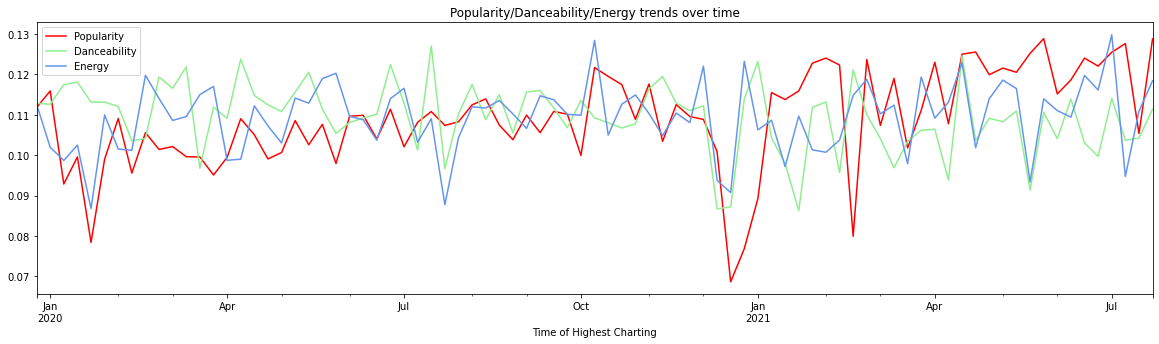

In [254]:
ax = scaled_df[['Popularity', 'Danceability', 'Energy']].plot(kind='line', 
                                                         title='Popularity/Danceability/Energy trends over time', 
                                                         figsize=(20,5),
                                                         color=['red','lightgreen','cornflowerblue'])
ax.set(xlabel='Time of Highest Charting')

First, we look at 'Popularity', 'Danceability', and 'Energy' trends side-by-side. It can be noted that there is a big dip in songs popularity near the end of January 2020, the lowest peak in mid-December 2020, and mid-February 2021.

We see peaks in 'Danceability' in early April 2020, early July 2020, and late December 2021 near the lowest peak of 'Popularity'. For 'Energy', we see peaks in March 2020, mid-July 2020, and early January 2021. Overall, we see that songs with higher 'Danceability' are generally coupled with higher 'Energy'. There are few discrepancies where these 2 attributes are rising but 'Popularity' hit its lowest peaks, specifically in mid-January 2020 and late December 2020.

Over time, both the Danceability and Energy of songs generally stay in the higher range.

#### Popularity/Speechiness/Acousticness trends over Time

[Text(0.5, 0, 'Time of Highest Charting')]

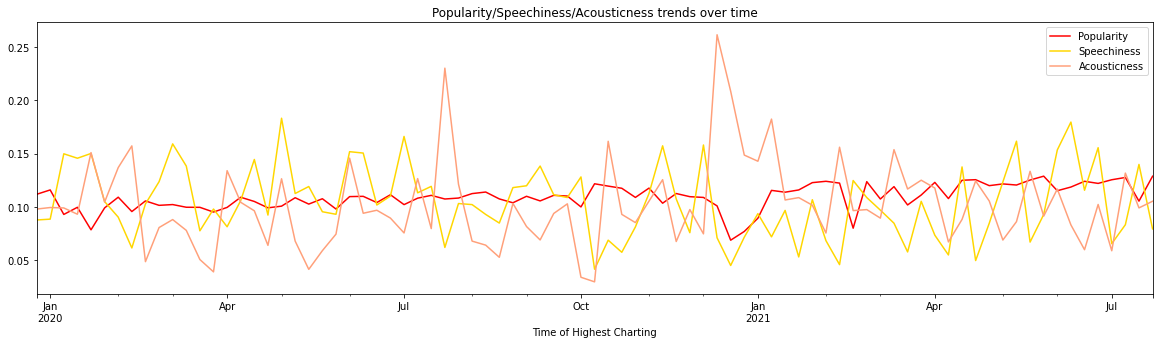

In [258]:
ax = scaled_df[['Popularity', 'Speechiness', 'Acousticness']].plot(kind='line', 
                                                              title='Popularity/Speechiness/Acousticness trends over time', 
                                                              figsize=(20,5), 
                                                              color=['red','gold','lightsalmon'])
ax.set(xlabel='Time of Highest Charting')

In this graph, we see that 'Acousticness' peaked in late July 2020 and late December 2020. ON the other hand, 'Speechiness' peaked in early May 2020 and early July 2021. There are more low peaks of Speechiness over the past 3 years compared to its high peaks, showing that people preferred songs with fewer words spoken. Acousticness are generally low over time as well with only the 2 outstanding peaks mentioned above. This graph shows that popular songs were generally low in both Speechiness and Acousticness over the past few years.

#### Popularity/Liveness/Acousticness trends over Time

[Text(0.5, 0, 'Time of Highest Charting')]

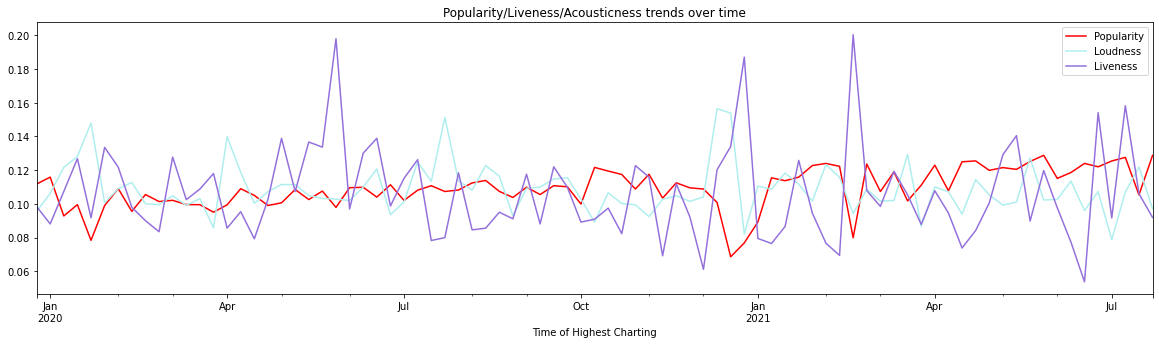

In [256]:
ax = scaled_df[['Popularity', 'Loudness', 'Liveness']].plot(kind='line', 
                                                       title='Popularity/Liveness/Acousticness trends over time', 
                                                       figsize=(20,5),
                                                       color=['red','paleturquoise','mediumpurple'])
ax.set(xlabel='Time of Highest Charting')

For 'Liveness', this graph has 3 highest peaks in June 2020, late December 2021, and March 2021. However, we can see that at every of these peaks, there was a dip in both 'Loudness' and 'Popularity' when looking at it in the bigger picture. For 'Loudness', songs generally stay in the average to above average range and rarely falls below the average across the past 3 years.

#### Popularity/Tempo/Valence trends over Time

[Text(0.5, 0, 'Time of Highest Charting')]

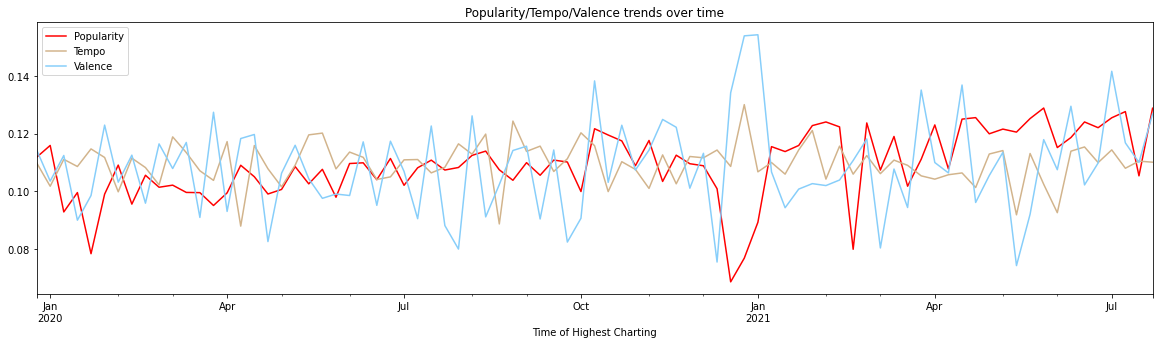

In [257]:
ax = scaled_df[['Popularity', 'Tempo', 'Valence']].plot(kind='line', 
                                                   title='Popularity/Tempo/Valence trends over time', 
                                                   figsize=(20,5),
                                                   color=['red','tan','lightskyblue'])
ax.set(xlabel='Time of Highest Charting')

In regards to 'Tempo, we see that most songs tempo stays within an average range over the years with no noticeable peaks or dips. On th eother hand, 'Valence' has greater range on how the value changes with the highest peak in January 2021. Since the range of Valence is wider, we can infer that songs with both lower and higher Valence were both favorited, with a slight preference for songs that are happier.

### Below are changing categorical variables into dummy ones 

In [188]:
ith_row = 0
cleaned_genre_col = []
for i in df["Genre"]:
    x=re.split("'",i)
    # avoids songs with no genre attribute 
    if len(x) > 1: 
       cleaned_genre_col.append(x[1])
    else:
        cleaned_genre_col.append(' ')

Variable **Genre** becomes **dummy_genre**
- 1: pop
- 0: not-pop

In [189]:
# change it into pop, not-pop
dummy_genre = []
for i in cleaned_genre_col:
    if re.search('pop',i):
        dummy_genre.append(1)
    else:
        dummy_genre.append(0) 

Variable **Week of Highest Charing** becomes **dummy_time**
- 2020 ~ 2021, covid: 1
- 2019, pre-coivd: 0

In [190]:
dummy_time = []
for i in df["Week of Highest Charting"]:
    if re.match('2019',i):
        dummy_time.append(0)
    else :
        dummy_time.append(1)

In [191]:
cleaned_df['Time'] = dummy_time
cleaned_df['Genre'] = dummy_genre

Below is a preview of our cleaned data for statistical linear regression analysis

In [192]:
cleaned_df.head()

,Popularity,Duration (m),Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Time,Genre
0,100.0,3.53,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,0.589,1,0
1,99.0,2.36,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,0.478,1,0
2,99.0,2.97,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,0.688,1,1
3,98.0,3.85,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,0.591,1,1
4,96.0,3.53,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,0.894,1,0


In [193]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [194]:
X=np.array(cleaned_df[cleaned_df.columns[1:3]])
Y=np.array(cleaned_df['Popularity'])

In [196]:
reg = LinearRegression().fit(X, Y)

Multiple Linear Regression (MLR) plots are difficle to show as they are not contained in the 2D space. We will use three predictors in this case to show a 3D graph, to give an idea of the multiple-dimensions that we are dealing with right now. 

In [201]:
from mpl_toolkits.mplot3d import Axes3D

In [219]:
X1 = np.array(cleaned_df[cleaned_df.columns[1:3]])
reg = LinearRegression().fit(X1, Y)
#Y1=X1[:,0]*reg.coef_[0]+X1[:,1]*reg.coef_[1]+reg.intercept_

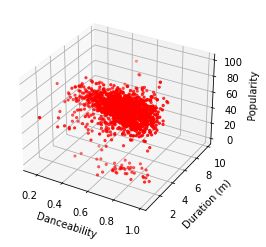

In [227]:
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X1[:,1], X1[:,0],Y, marker='.',color='red')
ax.set_xlabel('Danceability')
ax.set_ylabel('Duration (m)')
ax.set_zlabel('Popularity')
#xs=np.tile(X1[:0,])
#ys=np.tile(x1[:,1]).T
#zs=Y1
#ax.plot_surface(xs,ys,zs,alpha=0.5)
plt.show()

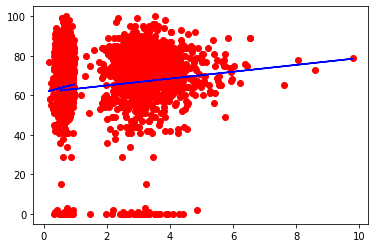

In [223]:
y2 = reg.intercept_ + reg.coef_ * X
plt.plot(X,Y,'ro',X,y2,'b-')

In [ ]:
import statsmodels.api as sm
import pylab as py

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


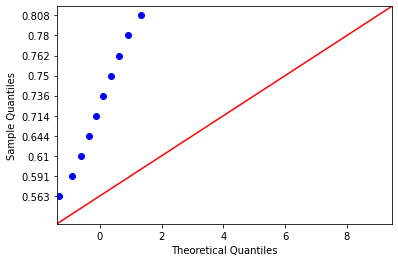

In [ ]:
sm.qqplot(df["Danceability"][0:10], line ='45')
py.show()

## Discussion  (what does your analysis show, what is the big picture, and how are these findings useful?) (500) 

## Conclusion